In [1]:
from __future__ import print_function, division
import os, bz2, json, time, sys, csv
from datetime import timedelta, datetime

import math
import collections
import numpy as np
import pandas as pd
import matplotlib as mpl

from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
from util_read import engage_read, read_vids, engage_tweets_read, merge_engage_tweets, engage_metadata

In [3]:
engage_dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos"
tweets_dataset_base = "G:/MLCV dataset/engagement'16/tweets_dataset_fixTZ"

categories_eligible = ["autos", "comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

file_vids_filter_all = "C:/Users/u6314203/pyProjects/hip-popularity/data/engage16/filtered/vids_filter_all.csv"

In [4]:
stat_attrs = ["daily_views", "daily_shares", "daily_tweets",
             "daily_views_st", "daily_views_lt",
             "daily_shares_st", "daily_shares_lt",
             "daily_tweets_st", "daily_tweets_lt",
             "perc_views_lt"]

In [5]:
def compute_period_daily(merged_dataset, timepoint = 90):
    stats = {
        "vids": [],
        "daily_views": [], "daily_shares": [], "daily_tweets": [],
        "daily_views_st": [], "daily_views_lt": [],
        "daily_shares_st": [], "daily_shares_lt": [],
        "daily_tweets_st": [], "daily_tweets_lt": [],
        "perc_views_lt": [], 
    }
    
    for vid, vals in merged_dataset.items():
        days = vals["days"]
        left, right = 0, len(days) - 1
        while left <= right:
            mid = (left+right)//2
            if mid <= 90:
                left = mid + 1
            else:
                right = mid - 1
        
        stats["vids"].append(vid)
        stats["daily_views"].append(np.mean(vals["viewCounts"]))
        stats["daily_shares"].append(np.mean(vals["shares"]))
        stats["daily_tweets"].append(np.mean(vals["tweets"]))
        stats["daily_views_st"].append(np.mean(vals["viewCounts"][:left]))
        stats["daily_views_lt"].append(np.mean(vals["viewCounts"][left:]))
        stats["daily_shares_st"].append(np.mean(vals["shares"][:left]))
        stats["daily_shares_lt"].append(np.mean(vals["shares"][left:]))
        stats["daily_tweets_st"].append(np.mean(vals["tweets"][:left]))
        stats["daily_tweets_lt"].append(np.mean(vals["tweets"][left:]))
        stats["perc_views_lt"].append(np.sum(vals["viewCounts"][left:])/np.sum(vals["viewCounts"]))

    return stats

#### Prepare dataset

In [6]:
# vids from all category
vids_filter_all = read_vids(file_vids_filter_all)

category = categories_eligible[1]
engage_dataset = engage_read(engage_dataset_base, category)
tweets_dataset = engage_tweets_read(tweets_dataset_base, category)
vids = vids_filter_all[category]

Vids(filtered) in each category:
autos:25712; comedy:31741; education:41191; entertainment:180128; film:43101; gaming:222236; howto:61027; music:118094; news:38249; people:222658; science:32278; sports:39649; travel:13112


comedy in engage: 100%|█████████████████████████████████████████████████████| 138068/138068 [00:11<00:00, 12213.20it/s]


Engage comedy size: 31519
Tweets comedy size: 31678


In [7]:
merged_dataset = merge_engage_tweets(engage_dataset, tweets_dataset)
engage_metadata = engage_metadata(engage_dataset_base, category)

Merged size: 31456


In [8]:
stats = compute_period_daily(merged_dataset)

#### Plotting

Text(0, 0.5, 'daily tweets (long-term)')

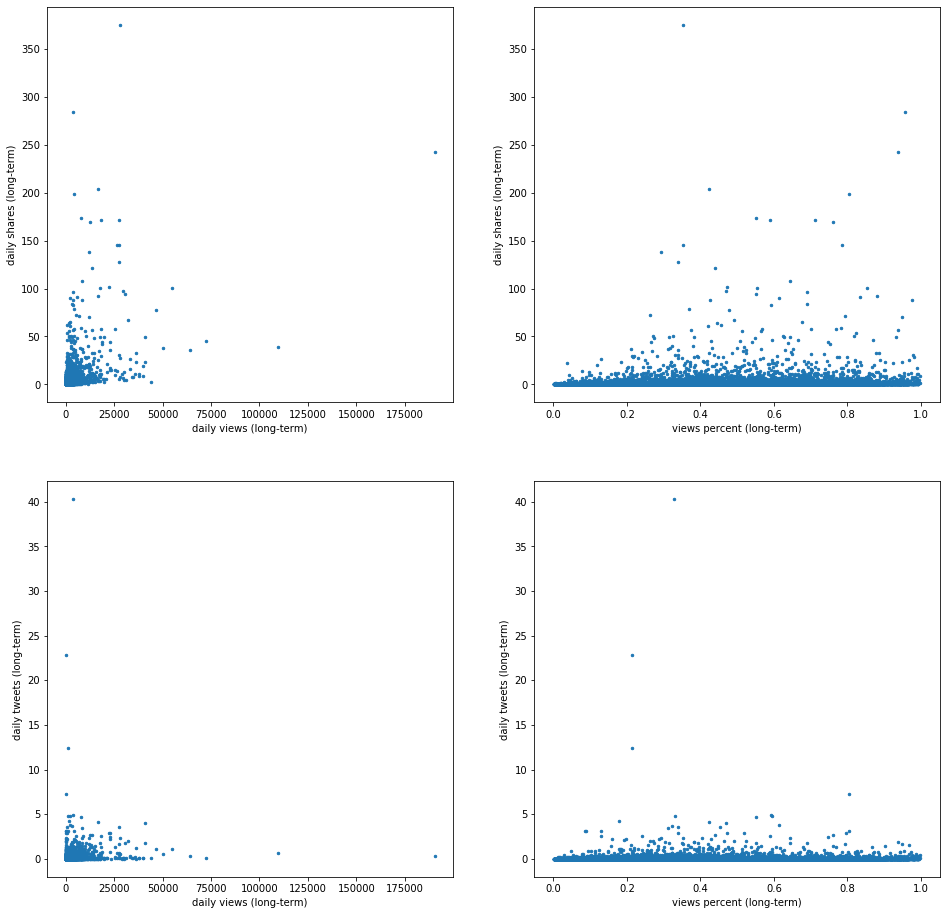

In [9]:
fig = plt.figure(figsize=(16, 16))

daily_views_lt, daily_shares_lt = stats["daily_views_lt"], stats["daily_shares_lt"]
ax = fig.add_subplot(221)
ax.scatter(daily_views_lt, daily_shares_lt, s = 6.0)
ax.set_xlabel("daily views (long-term)")
ax.set_ylabel("daily shares (long-term)")

perc_views_lt, daily_shares_lt = stats["perc_views_lt"], stats["daily_shares_lt"]
ax = fig.add_subplot(222)
ax.scatter(perc_views_lt, daily_shares_lt, s = 6.0)
ax.set_xlabel("views percent (long-term)")
ax.set_ylabel("daily shares (long-term)")

daily_views_lt, daily_tweets_lt = stats["daily_views_lt"], stats["daily_tweets_lt"]
ax = fig.add_subplot(223)
ax.scatter(daily_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("daily views (long-term)")
ax.set_ylabel("daily tweets (long-term)")

perc_views_lt, daily_tweets_lt = stats["perc_views_lt"], stats["daily_tweets_lt"]
ax = fig.add_subplot(224)
ax.scatter(perc_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("views percent (long-term)")
ax.set_ylabel("daily tweets (long-term)")

# TODO: percentile

In [12]:
def outlier_remove_empirical(arr_att1, arr_att2):
    arr1 = np.array(arr_att1)
    arr2 = np.array(arr_att2)
    
    arr1[arr1 < 0] = np.nan
    arr1[arr1 > 25000] = np.nan
    arr2[np.isnan(arr1)] = np.nan
    
    arr2[arr2 < 0] = np.nan
    arr2[arr2 > 5] = np.nan
    arr1[np.isnan(arr2)] = np.nan
    return arr1, arr2

C:\Users\u6314203\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
C:\Users\u6314203\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'daily tweets (long-term) (removed empirically)')

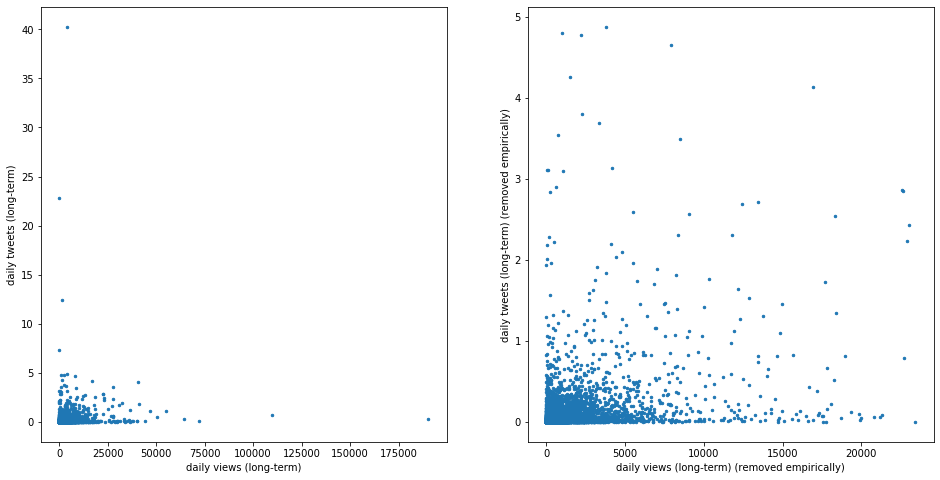

In [13]:
fig = plt.figure(figsize=(16, 8))

daily_views_lt, daily_tweets_lt = stats["daily_views_lt"], stats["daily_tweets_lt"]
ax = fig.add_subplot(121)
ax.scatter(daily_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("daily views (long-term)")
ax.set_ylabel("daily tweets (long-term)")

daily_views_lt, daily_tweets_lt = outlier_remove_empirical(stats["daily_views_lt"], stats["daily_tweets_lt"])
ax = fig.add_subplot(122)
ax.scatter(daily_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("daily views (long-term) (removed empirically)")
ax.set_ylabel("daily tweets (long-term) (removed empirically)")

In [14]:
def percentile_views(viewcounts, promotions):
    n = len(viewcounts)
    arr = [(viewcounts[i], i) for i in range(n)]
    arr.sort()
    views_percentile = [(j+1)/n for j in range(n)]
    promotions_reordered = [promotions[x[1]] for x in arr]
    return views_percentile, promotions_reordered

Text(0, 0.5, 'daily tweets (long-term)')

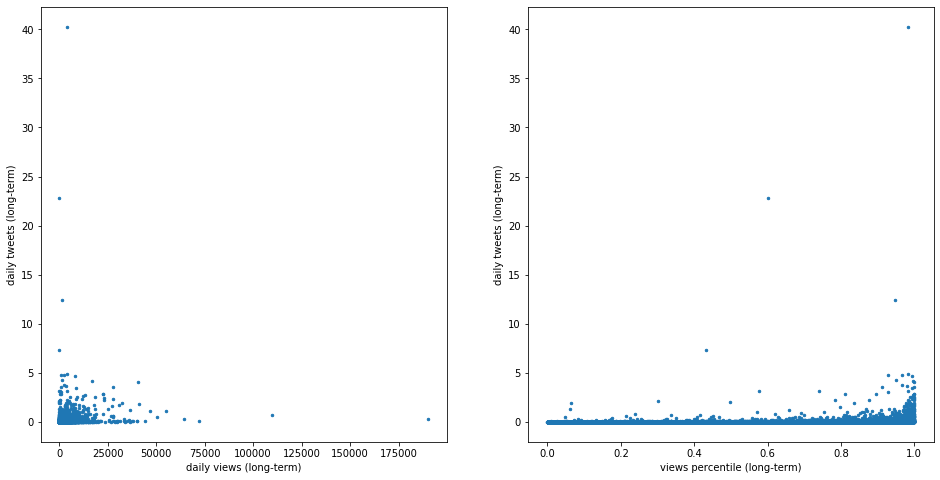

In [15]:
fig = plt.figure(figsize=(16, 8))

daily_views_lt, daily_tweets_lt = stats["daily_views_lt"], stats["daily_tweets_lt"]
ax = fig.add_subplot(121)
ax.scatter(daily_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("daily views (long-term)")
ax.set_ylabel("daily tweets (long-term)")

views_percentile, daily_tweets_lt = percentile_views(stats["daily_views_lt"], stats["daily_tweets_lt"])
ax = fig.add_subplot(122)
ax.scatter(views_percentile, daily_tweets_lt, s = 6.0)
ax.set_xlabel("views percentile (long-term)")
ax.set_ylabel("daily tweets (long-term)")

#### Look at typical videos

In [18]:
def video_search(merged_dataset, engage_metadata, stats):
    def searchFunc(val, expect):
        return val >= expect
    ret = collections.defaultdict(dict)
    for i, vid in enumerate(stats["vids"]):
        if searchFunc(stats["daily_views"][i], 140000):
            ret[vid]['insights'] = merged_dataset[vid]
            ret[vid]['metadata'] = engage_metadata[vid]
            ret[vid]["stats"] = dict()
            for attr in stat_attrs:
                ret[vid]["stats"][attr] = stats[attr][i]
            break
    return ret

In [19]:
tmp = video_search(merged_dataset, engage_metadata, stats)
for key in tmp.keys():
    print(key)
    print(tmp[key]['metadata'])
    print(tmp[key]['stats'])

btrgg4jSiVs
{'title': 'Disney Princess Go Back To School', 'channelTitle': 'Rclbeauty101', 'categoryId': '23', 'detectLang': 'en'}
{'daily_views': 144456.07986111112, 'daily_shares': 55.52430555555556, 'daily_tweets': 4.465277777777778, 'daily_views_st': 220121.2857142857, 'daily_views_lt': 109504.13197969543, 'daily_shares_st': 92.0989010989011, 'daily_shares_lt': 38.629441624365484, 'daily_tweets_st': 12.604395604395604, 'daily_tweets_lt': 0.7055837563451777, 'perc_views_lt': 0.5185234718232192}


#### some failed attempt

In [10]:
def outlier_remove(arr_att1, arr_att2):
    arr1 = np.array(arr_att1)
    arr2 = np.array(arr_att2)
    
    q75, q25 = np.percentile(arr1, [99,1])
    intr_qr = q75-q25 
    upper = q75+(1.99*intr_qr)
    lower = q25-(1.99*intr_qr)
    arr1[arr1 < lower] = np.nan
    arr1[arr1 > upper] = np.nan
    arr2[np.isnan(arr1)] = np.nan
    
    q75, q25 = np.percentile(arr2, [99,1])
    intr_qr = q75-q25 
    upper = q75+(1.99*intr_qr)
    lower = q25-(1.99*intr_qr)
    arr2[arr2 < lower] = np.nan
    arr2[arr2 > upper] = np.nan
    arr1[np.isnan(arr2)] = np.nan
    return arr1, arr2

C:\Users\u6314203\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\u6314203\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less
C:\Users\u6314203\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


Text(0, 0.5, 'daily tweets (long-term) (removed outlier)')

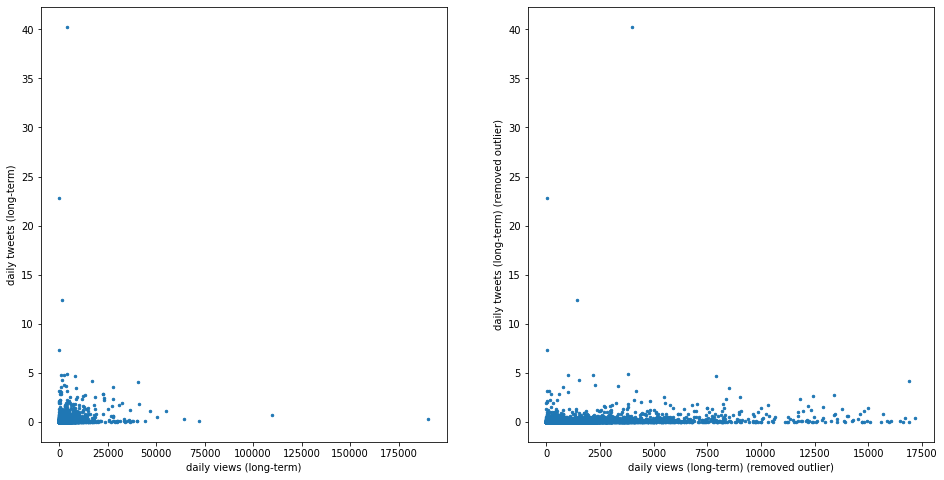

In [11]:
fig = plt.figure(figsize=(16, 8))

daily_views_lt, daily_tweets_lt = stats["daily_views_lt"], stats["daily_tweets_lt"]
ax = fig.add_subplot(121)
ax.scatter(daily_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("daily views (long-term)")
ax.set_ylabel("daily tweets (long-term)")

daily_views_lt, daily_tweets_lt = outlier_remove(stats["daily_views_lt"], stats["daily_tweets_lt"])
ax = fig.add_subplot(122)
ax.scatter(daily_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("daily views (long-term) (removed outlier)")
ax.set_ylabel("daily tweets (long-term) (removed outlier)")

In [16]:
def percentile_two_attrs(viewcounts, promotions):
    n = len(viewcounts)
    
    arr1 = [(viewcounts[i], i) for i in range(n)]
    arr1.sort()
    arr2 = [(promotions[i], i) for i in range(n)]
    arr2.sort()    

    views_percentile = [-1]*n
    proms_percentile = [-1]*n
    for i in range(n):
        idx = arr1[i][1]
        views_percentile[idx] = (i+1)/n
    for i in range(n):
        idx = arr2[i][1]
        proms_percentile[idx] = (i+1)/n
    return views_percentile, proms_percentile

Text(0, 0.5, 'tweets percentile (long-term)')

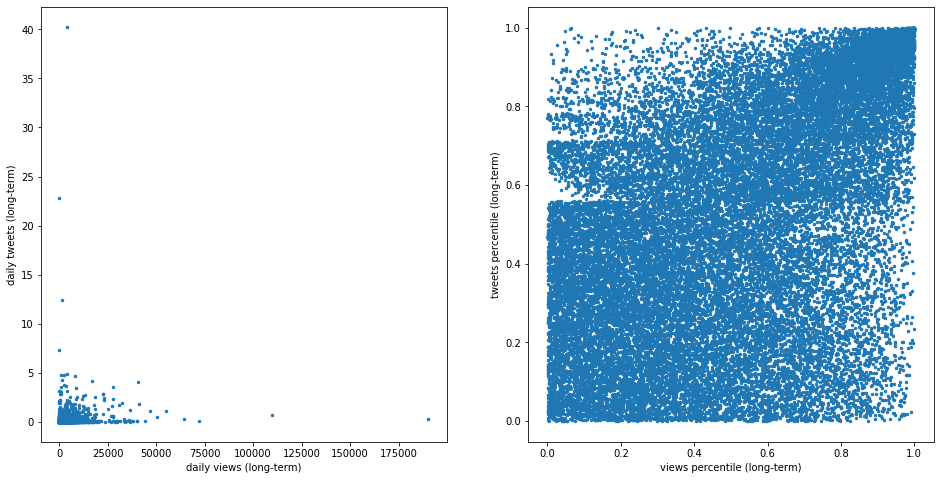

In [17]:
fig = plt.figure(figsize=(16, 8))

daily_views_lt, daily_tweets_lt = stats["daily_views_lt"], stats["daily_tweets_lt"]
ax = fig.add_subplot(121)
ax.scatter(daily_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("daily views (long-term)")
ax.set_ylabel("daily tweets (long-term)")

views_percentile, tweets_percentile = percentile_two_attrs(stats["daily_views_lt"], stats["daily_tweets_lt"])
ax = fig.add_subplot(122)
ax.scatter(views_percentile, tweets_percentile, s = 6.0)
ax.set_xlabel("views percentile (long-term)")
ax.set_ylabel("tweets percentile (long-term)")